## <font style="color:rgb(50,120,229)">Contrast Limited Adaptive Histogram Equalization (CLAHE) </font>

Histogram equalization uses the pixels of the entire image to improve contrast. While this may look good in many cases, sometimes we may want to enhance the contrast locally so the image does not looks more natural and less dramatic. 

For such applications, we use [Contrast Limited Adaptive Histogram Equalization (CLAHE)](https://docs.opencv.org/4.1.0/d5/daf/tutorial_py_histogram_equalization.html) ) which improves the local contrast. More importantly it allows us to specify the size of the neighborhood that is considered "local".  

Let's pick a different image, where we may prefer CLAHE in place of regular histogram equalization. 

In [1]:
import cv2
import matplotlib.pyplot as plt
from dataPath import DATA_PATH
import numpy as np
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (50.0, 50.0)
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['axes.titlesize'] = 40
matplotlib.rcParams['image.interpolation'] = 'bilinear'

(-0.5, 666.5, 999.5, -0.5)

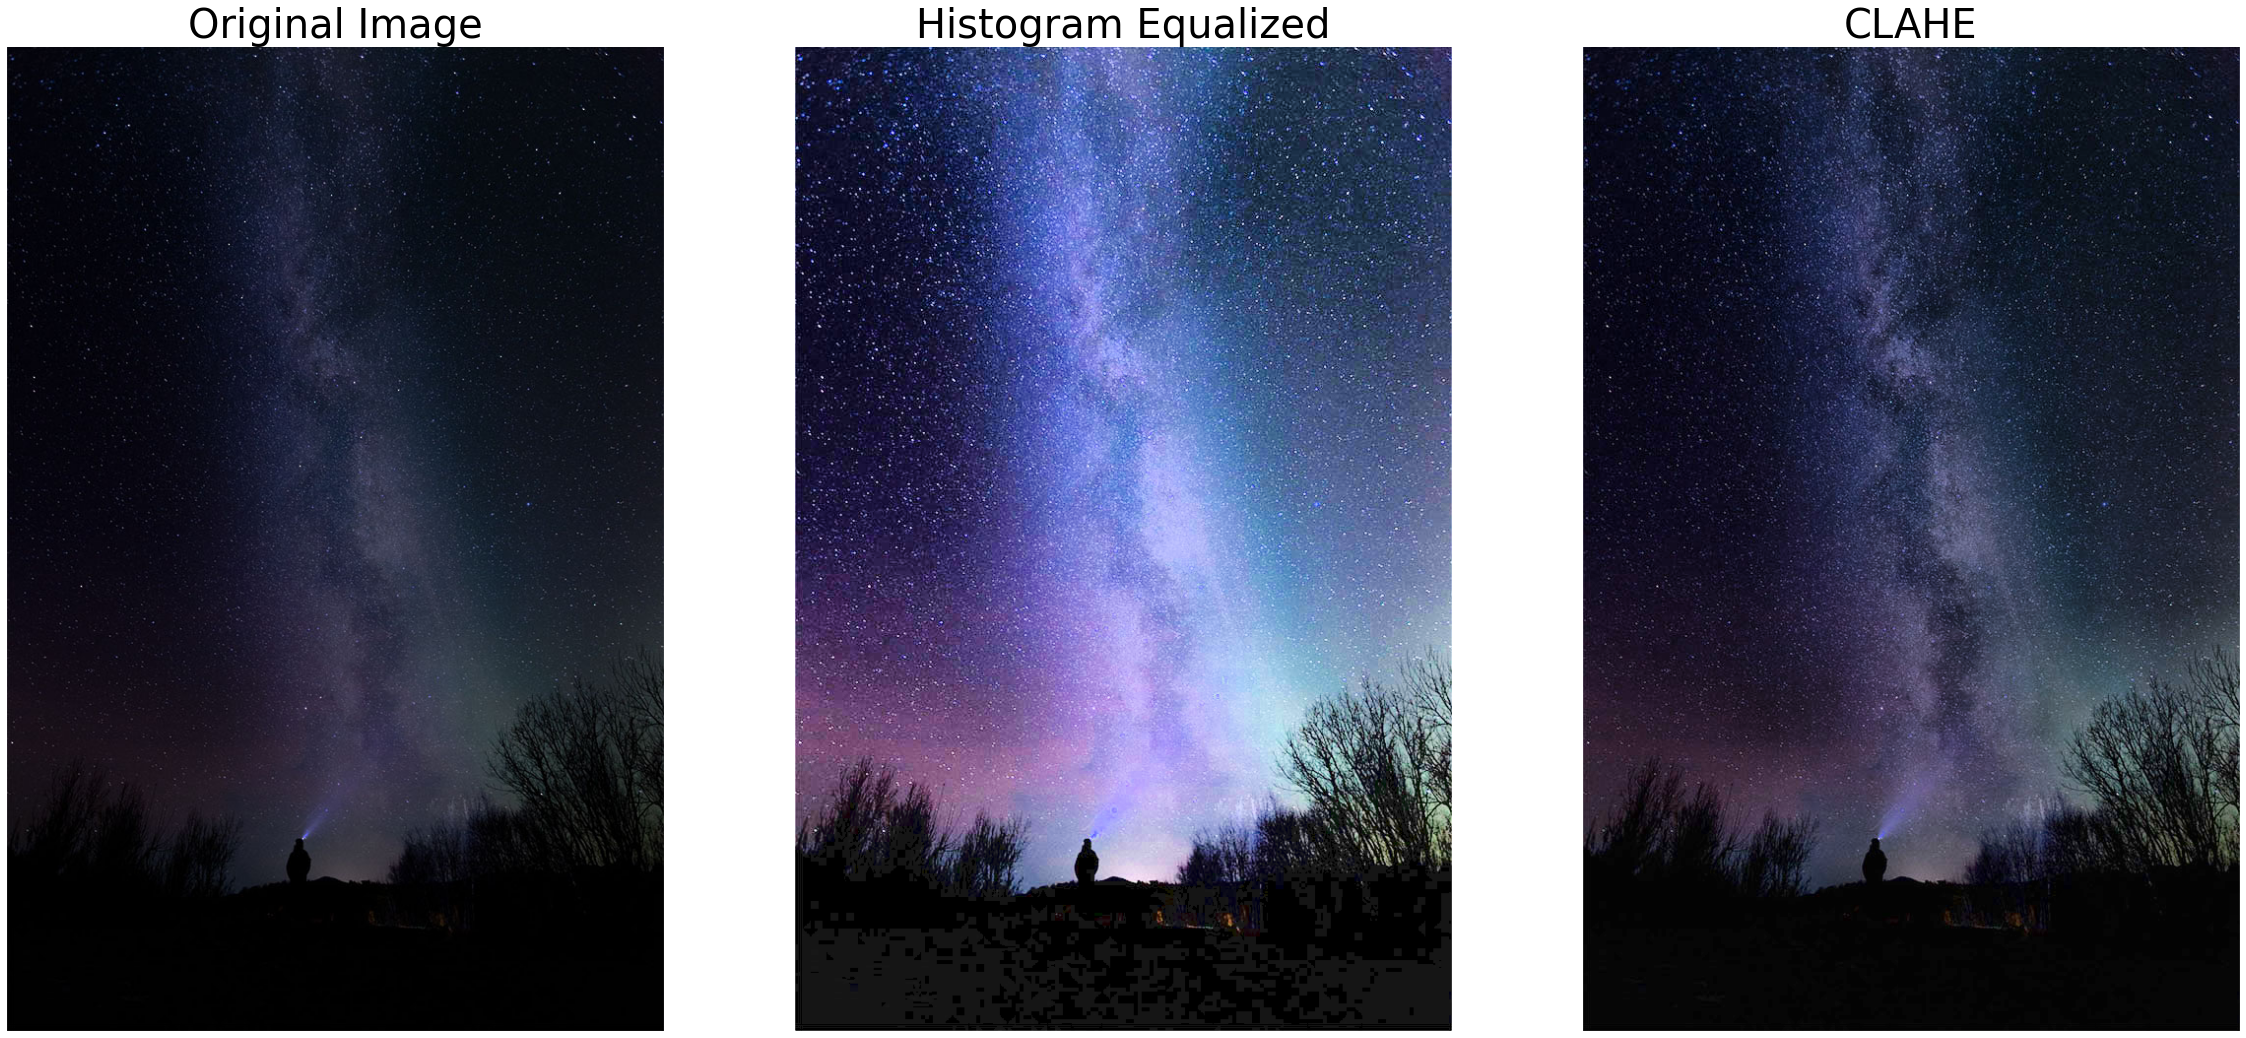

In [3]:
# Read color image
filename = DATA_PATH+"images/night-sky.jpg"
im = cv2.imread(filename)

# Convert to HSV 
imhsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
imhsvCLAHE = imhsv.copy()

# Perform histogram equalization only on the V channel
imhsv[:,:,2] = cv2.equalizeHist(imhsv[:,:,2])

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
imhsvCLAHE[:,:,2] = clahe.apply(imhsvCLAHE[:,:,2])

# Convert back to BGR format
imEq = cv2.cvtColor(imhsv, cv2.COLOR_HSV2BGR)
imEqCLAHE = cv2.cvtColor(imhsvCLAHE, cv2.COLOR_HSV2BGR)


#Display images
plt.figure(figsize=(40,40))

ax = plt.subplot(1,3,1)
plt.imshow(im[:,:,::-1], vmin=0, vmax=255)
ax.set_title("Original Image")
ax.axis('off')


ax = plt.subplot(1,3,2)
plt.imshow(imEq[:,:,::-1], vmin=0, vmax=255)
ax.set_title("Histogram Equalized")
ax.axis('off')

ax = plt.subplot(1,3,3)
plt.imshow(imEqCLAHE[:,:,::-1], vmin=0, vmax=255)
ax.set_title("CLAHE")
ax.axis('off')

From the above figure, it is clear that CLAHE performs stretching of values locally since all the peaks in the original histogram have died down. The final image is much more faithful to the original intent of the photographer. 